In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = "./data/mushrooms.csv"

data = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(data.shape))
data.head(5)  # top 5 contents

DataSet Size : (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
## Validate DataSet (find NaN)
data.isnull().any()  # There aren't any NaN cols

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [4]:
## DataSet infomation
data.info()

"""
- 8124 data
- 22 features (except 'class')
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

"\n- 8124 data\n- 22 features (except 'class')\n"

In [5]:
## class(label) validation
data['class'].unique()

"""
'p' stands for poisoned mushroom
"""

"\n'p' stands for poisoned mushroom\n"

In [6]:
## Label Transform
"""
'p' to 1, 'e' to 0
"""
data['class'] = data['class'].replace('p', 1)
data['class'] = data['class'].replace('e', 0)

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
## split into train_x, train_y
train_y = data['class']

data.drop('class', axis=1, inplace=True)  # drop label
train_x = data

print(train_x.shape, train_y.shape)

(8124, 22) (8124,)


In [9]:
## split into train/validate
from sklearn.model_selection import train_test_split

split_rate = 0.2
random_state = 42

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, shuffle=True, random_state=random_state, test_size=split_rate)

In [10]:
## Simple Model (LogisticRegression)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = svm.SVC(kernel='rbf', gamma=0.25, C=1)
models = [model1, model2, model3, model4]

In [11]:
## Training
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

m_preds = []
for m in models[:-1]:
    m.fit(train_x, train_y)
    score = m.score(valid_x, valid_y)

    preds = m.predict_proba(valid_x)[:, 1]  # positive class
    m_preds.append(preds)  # saving model prediction
    print("AUC : {}".format(score))

AUC : 0.9464615384615385
AUC : 1.0
AUC : 1.0


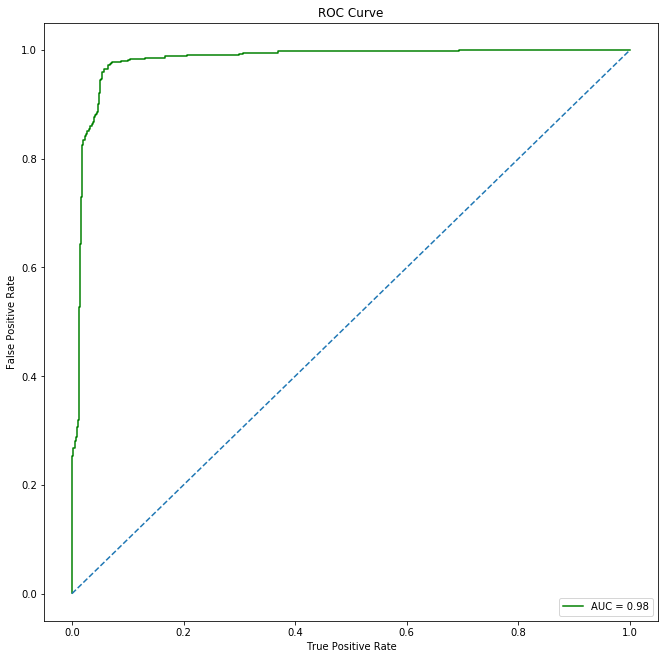

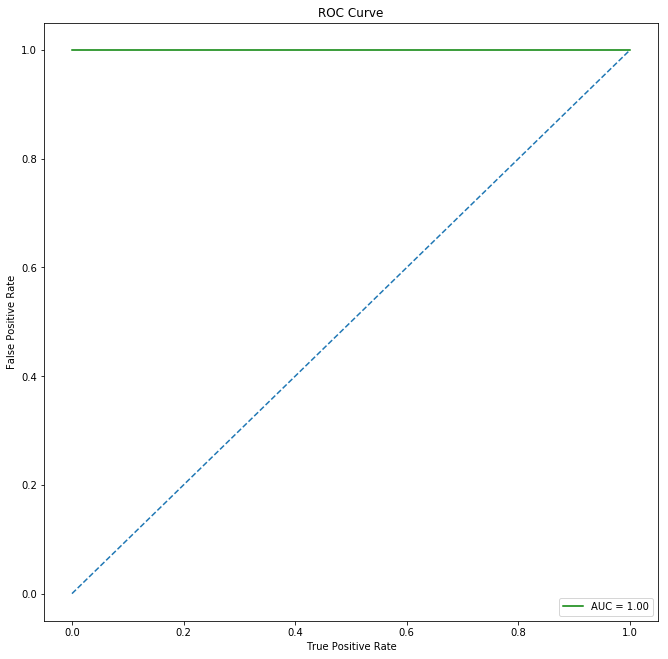

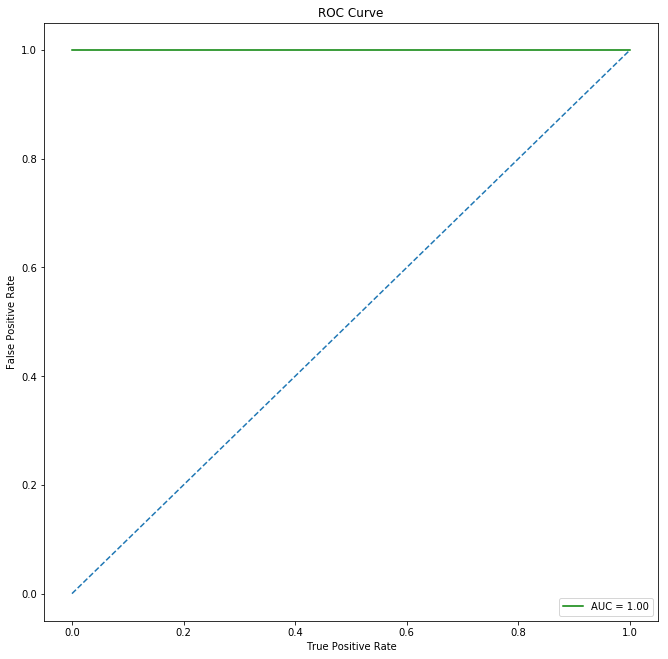

In [12]:
for p in m_preds:
    fp, tp, th = roc_curve(valid_y, p)
    
    roc_auc = metrics.roc_auc_score(valid_y, p)

    plt.figure(figsize=(11, 11))
    plt.title("ROC Curve")
    
    plt.plot(fp, tp, color='green', label='AUC = %.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')